# Example Usage

In [1]:
import chalc as ch
import numpy as np
import matplotlib.pyplot as plt
import h5py
import warnings

For our data we sample 100 points on a circle with some noise and 100 points from inside the unit disk.

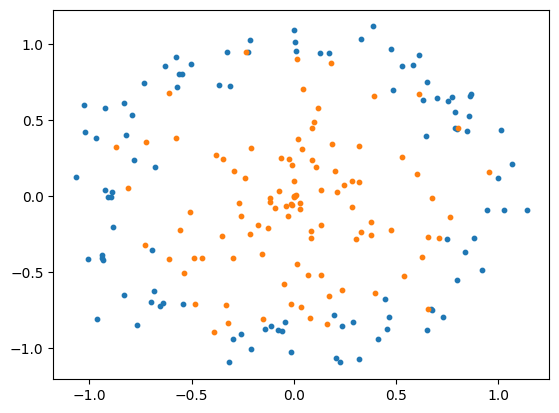

In [2]:
np.random.seed(40)
num_points = 100
mean = [0, 0]
cov = np.eye(2)*0.01
x = np.array([[np.sin(2*np.pi*t), np.cos(2*np.pi*t)] for t in np.random.rand(num_points)]).T +\
    np.random.default_rng().multivariate_normal(mean, cov, num_points).T # points as columns
y = np.random.rand(num_points) * np.array([[np.sin(2*np.pi*t), np.cos(2*np.pi*t)] for t in np.random.rand(num_points)]).T
plt.scatter(x[0, :], x[1, :], s=10)
plt.scatter(y[0, :], y[1, :], s=10)
colours = [0]*100 + [1]*100
points = np.concatenate((x,y), axis=1)

We compute the chromatic alpha complex $K$ of the point cloud. $K$ has far fewer simplices than either the Cech or Vietoris-Rips complex, which each have $\displaystyle \binom{200}{2} = 19900$ edges and $\displaystyle \binom{200}{3} = 1313400$ 2-simplices. 

In [3]:
K = ch.chromatic.alpha(points, colours)
print(f'{len(K.simplices[1])} 1-simplices')
print(f'{len(K.simplices[2])} 2-simplices')

946 1-simplices
1296 2-simplices


We can compute the six-pack of persistent homology diagrams of the chromatic alpha complex.

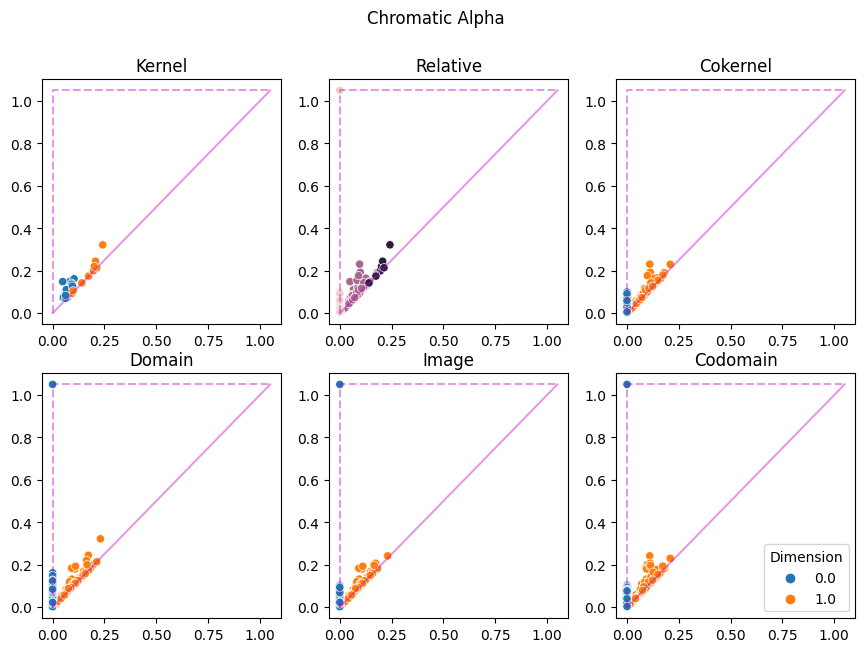

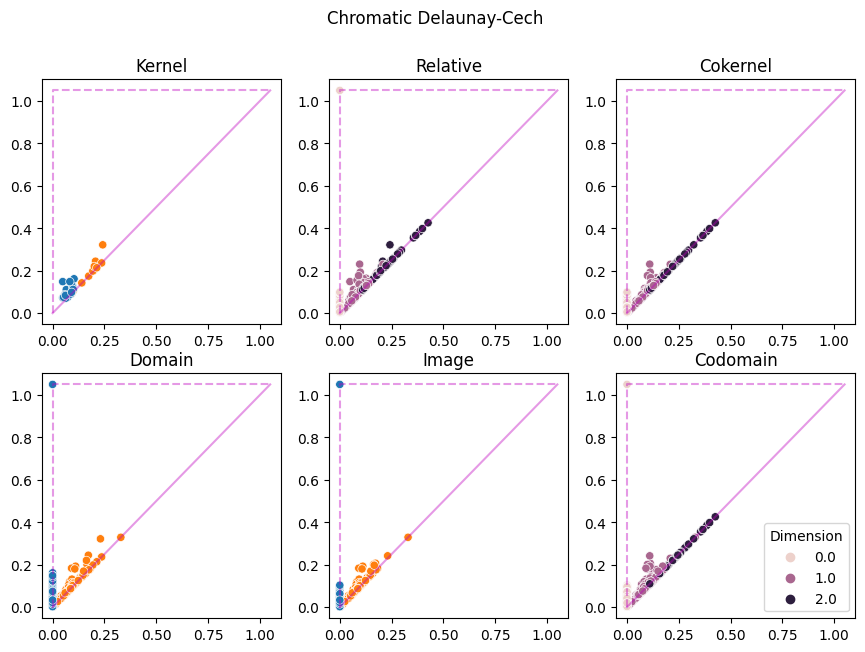

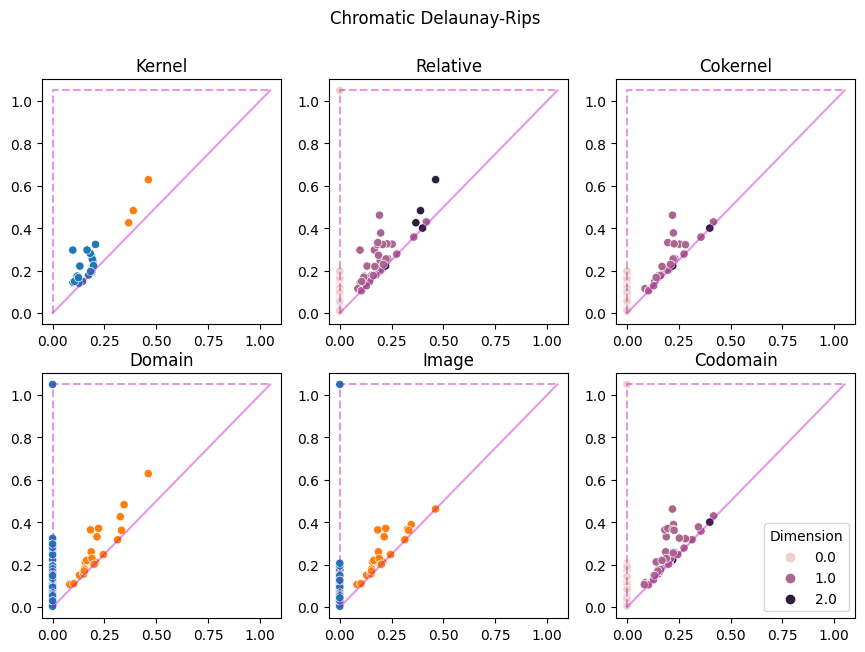

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    truncation = 1.0
    dgms_alpha = ch.sixpack.compute(points, colours, dom=[0,], method="chromatic alpha")
    fig_alpha, ax_alpha = ch.plotting.plot_sixpack(dgms_alpha, truncation, max_diagram_dim=2)
    fig_alpha.suptitle('Chromatic Alpha')
    dgms_delcech = ch.sixpack.compute(points, colours, dom=[0,], method="chromatic delcech")
    fig_delcech, ax_delcech = ch.plotting.plot_sixpack(dgms_delcech, truncation, max_diagram_dim=2)
    fig_delcech.suptitle('Chromatic Delaunay-Cech')
    dgms_delrips = ch.sixpack.compute(points, colours, dom=[0,], method="chromatic delrips")
    fig_delrips, ax_delrips = ch.plotting.plot_sixpack(dgms_delrips, truncation, max_diagram_dim=2)
    fig_delrips.suptitle('Chromatic Delaunay-Rips')



We can save the diagrams to file or load a diagram from file:

In [5]:
with h5py.File('test.h5', 'w') as f:
    ch.sixpack.save_diagrams(dgms_alpha, f)

with h5py.File('test.h5', 'r') as f:
    dgms = ch.sixpack.load_diagrams(f)

In [6]:
dgms

DiagramEnsemble(ker=Diagram(paired={(1704, 1707), (1794, 1814), (2436, 2437), (1641, 1642), (463, 480), (1536, 1537), (1542, 1553), (539, 555), (2110, 2111), (397, 526), (2023, 2024), (1862, 1863), (517, 771), (405, 542), (1810, 1828), (617, 809), (2115, 2116), (1899, 1900), (1440, 1441), (1858, 1865), (585, 701), (1846, 1961), (2056, 2057), (563, 591), (2428, 2429), (1349, 1376), (558, 744), (1833, 1890), (1948, 2081), (570, 736), (348, 769), (1988, 1989), (573, 582), (422, 456), (2415, 2416), (1321, 1330), (2337, 2338), (2008, 2009), (2025, 2026), (433, 651), (416, 519), (1649, 1650), (2076, 2077), (2200, 2201), (1741, 1742), (1686, 1687), (594, 656), (1829, 1830), (2003, 2004), (1425, 1426), (2196, 2197), (2412, 2413), (1788, 1789), (579, 713), (379, 481), (353, 465), (1953, 1954)}, unpaired=set()), cok=Diagram(paired={(1910, 2672), (1046, 2189), (990, 2047), (1092, 2305), (380, 1193), (490, 1315), (875, 1782), (1925, 2679), (643, 1405), (2168, 2824), (1346, 2459), (2250, 2875), (23

We can visualise the 2-skeleton of the filtration for points in 2D:

In [14]:
ani = ch.plotting.animate_filtration(K, points, np.linspace(0, 1.0, 45), 5)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ani